# **CAPSTONE MODUL 3**

## **1. Import Libraries**

In [1]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

# evaluation metrics
from sklearn.metrics import precision_score, make_scorer, ConfusionMatrixDisplay, roc_auc_score, average_precision_score, confusion_matrix

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost import XGBClassifier
import xgboost

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Polynomial feature
from sklearn.preprocessing import PolynomialFeatures

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor

## **2. Load Dataset**

In [2]:
base_dir = "D:\\Purwadhika\\Syntax Files\\CAPSTONE\\MODUL 3\\"
df = pd.read_csv(base_dir + "data_travel_insurance.csv", encoding="unicode_escape")
df.head()

Agency    Agency Type Distribution Channel              Product Name Gender  \
0    C2B       Airlines               Online        Annual Silver Plan      F   
1    EPX  Travel Agency               Online         Cancellation Plan    NaN   
2    JZI       Airlines               Online                Basic Plan      M   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan    NaN   
4    C2B       Airlines               Online               Bronze Plan      M   

   Duration    Destination  Net Sales  Commision (in value)  Age Claim  
0       365      SINGAPORE      216.0                  54.0   57    No  
1         4       MALAYSIA       10.0                   0.0   33    No  
2        19          INDIA       22.0                   7.7   26    No  
3        20  UNITED STATES      112.0                   0.0   59    No  
4         8      SINGAPORE       16.0                   4.0   28    No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## **3. Introduction**

### **3.1. Context**

Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

### **3.2. Bussiness Problem**

The core challenge for the travel insurance company is **unpredictable financial liability** arising from policyholder claims. Without an accurate mechanism to forecast which policies are high-risk, the company faces two major financial inefficiencies:

1.  **Inaccurate Capital Reserving (Underwriting Risk):** The company may under-reserve capital, leading to solvency issues during peak claims periods, or over-reserve, leading to inefficient capital utilization.
2.  **Suboptimal Pricing and Fraud Management:** High-risk policies may be underpriced relative to their actual expected cost, and resources are wasted investigating low-risk claims rather than focusing on truly suspicious or high-probability claims.

**Business Problem Statement:** *How can we accurately predict, at the time of policy issuance, which travel insurance policyholders are most likely to submit a claim, in order to improve risk assessment, optimize capital reserves, and refine pricing strategy?*

### **3.3. Goals**

The goals must be measurable and directly address the business problem.

| Type of Goal | Description | Measurability |
| :--- | :--- | :--- |
| **Primary ML Goal (Accuracy)** | Develop a predictive model capable of identifying high-risk claim policiesamong all actual claim policies. | Model Recall Score|
| **Operational Goal (Efficiency)** | Integrate the prediction score into the underwriting process to automate high-risk flag creation | Eficiency underwriting review time. |
| **Financial Goal (Impact)** | Reduce the overall claim loss ratio (Claims Paid / Premiums Earned) by accurately identifying and appropriately pricing high-risk segments. | Decrease in Loss |
| **Strategic Goal** | Identify key driver features (e.g., specific destinations, duration, or agency type) that significantly influence claim probability to inform future product design and segmentation. | Generation of actionable insights reports for the Product Development team. |

### **3.4. Bussiness Metrics**

## Confusion Matrix: Cost Analysis for Travel Insurance Claim Prediction

|  | **Predicted: No Claim** | **Predicted: Claim** |
|---|---|---|
| **Actual: No Claim** | **True Negative (TN)**<br><br>✅ **Correct Prediction - IDEAL SCENARIO**<br><br>**What happens:** Customer doesn't file a claim, and model correctly predicted no claim<br><br>**Financial Impact per case:**<br>- Premium collected: **$311** (avg. 2025)<br>- No claim payout: **$0**<br>- Admin costs: **~$31** (10% of premium)<br>- **Net profit: ~$280** (90% retention)<br><br>**Benefit:** Optimal outcome - accurate risk assessment, appropriate pricing, efficient resource allocation, maximum profitability | **False Positive (FP)**<br><br>⚠️ **Type I Error**<br><br>**What happens:** Customer doesn't file a claim, but model predicted they would<br><br>**Financial Impact per case:**<br>- Premium collected: **$311**<br>- No claim payout: **$0**<br>- **Excess reserve allocation: $50-$200**<br>- Higher admin costs: **~$50-$100**<br>- Opportunity cost of capital<br><br>**Net Impact: -$50 to -$500** (operational inefficiency, but still profitable)<br><br>**Impact:**<br>- Unnecessary reserve allocation<br>- Slightly inflated premiums<br>- Wasted administrative resources<br><br>**Severity:** LOW RISK |
| **Actual: Claim** | **False Negative (FN)**<br><br>🔴 **Type II Error - WORST CASE**<br><br>**What happens:** Customer files a claim, but model predicted they wouldn't<br><br>**Financial Impact per case:**<br>- Premium collected: **$311**<br>- Admin costs: **~$31**<br>- **Unexpected claim payout:**<br>  - Average: **$2,609**<br>  - Trip cancellation: **$5,000**<br>  - Medical evacuation: **$10,000+**<br>  - Complex medical: **Up to $3,000,000**<br><br>**Net Loss: -$2,329 to -$9,720+**<br>(or worse for extreme cases)<br><br>**Impact:**<br>- Direct unexpected financial loss<br>- Inadequate reserves (regulatory risk)<br>- Underpriced premiums<br>- Threatens profitability & solvency<br>- Loss ratio exceeds 100%<br><br>**Severity:** 🔴 HIGH RISK<br>**Cost Ratio:** **5-30x more expensive than FP** | **True Positive (TP)**<br><br>✅ **Correct Prediction**<br><br>**What happens:** Customer files a claim, and model correctly predicted it<br><br>**Financial Impact per case:**<br>- Premium collected: **$311**<br>- Adequate reserves set aside: **$2,609-$10,000**<br>- Admin costs: **~$100-$150**<br>- Claim payout: **$2,609** (avg.)<br><br>**Net Impact: -$2,448** (planned loss, managed risk)<br><br>**However, pricing adjusts for this:**<br>- Risk-based premium: **~$450-$600**<br>- After payout & admin: **Break-even or slight profit**<br><br>**Benefit:**<br>- Proper reserves allocated<br>- Accurate risk-based pricing<br>- Prepared for payout<br>- Maintains overall profitability<br>- Premium adequately covers risk |

### Financial Summary

| Metric | True Negative | False Positive | False Negative | True Positive |
|--------|---------------|----------------|----------------|---------------|
| **Premium Collected** | $311 | $311 | $311 | $311-$600 (risk-adjusted) |
| **Claim Payout** | $0 | $0 | -$2,609 to -$10,000+ | -$2,609 (avg.) |
| **Admin/Reserve Costs** | -$31 | -$50 to -$500 | -$31 | -$100 to -$150 |
| **Net Financial Impact** | **+$280 profit** | **-$50 to -$500 loss** | **-$2,329 to -$9,720+ loss** | **$0 to +$50 profit** |
| **Impact on Business** | ✅ Ideal | ⚠️ Manageable | 🔴 Critical | ✅ Sustainable |

### Key Industry Benchmarks
- **Average premium (2025):** $311 per policy
- **Average claim payout:** $2,609 (6x the premium cost)
- **Target profit margin:** 20-50% in travel insurance
- **Medical Loss Ratio (MLR):** Insurance companies typically pay out 80-90% of premiums
- **Administrative costs:** 10-20% of premiums
- **Claims-to-premium ratio:** Healthy ratio is 60-80%

### Critical Insight
**False Negative is 5-30x more expensive than False Positive** because:
1. Average FN direct loss: $2,329-$9,720+ per case
2. Average FP operational cost: $50-$500 per case
3. FN threatens financial solvency; FP only reduces efficiency
4. Insurance profitability depends on accurate claim prediction

### Model Recommendation
For the cost analysis, we will use the worst case scenario for every prediction outcome:
- **TN** =  +$280 profit
- **FP** = -$500 loss
- **FN** =  -$9,720 loss
- **TP** =  $0 profit

**Optimize for HIGH RECALL (minimize False Negatives)** even at the cost of lower precision. The business can absorb operational inefficiencies from False Positives, but cannot sustain the financial shock of unexpected claims from False Negatives.

**Target metrics:**
- Fbeta scorer


---
**References:**
- [Premium and claim statistics: Squaremouth 2025 travel insurance data]( https://www.squaremouth.com/travel-advice/cost-for-travel-insurance)
- Industry profit margins: Travel insurance market analysis 2024-2025
- Administrative costs: Insurance industry MLR standards and benchmarks

### **3.5.Stakeholder**

| Stakeholder Group | Interest/Involvement | How the ML Model Affects Them |
| :--- | :--- | :--- |
| **Risk Management / Actuarial Team** | Owns the responsibility for assessing and quantifying risk. | Provides them with a dynamic, data-driven tool to improve pricing models, calculate precise technical reserves, and estimate future liabilities. |
| **Underwriting Department** | Responsible for approving policies and setting initial prices/coverage terms. | The model provides a risk score for every application, automating flagging of high-risk policies for manual review and fast-tracking low-risk ones. |
| **Finance / Executive Leadership** | Responsible for capital allocation, profitability, and solvency. | Improved claims predictability leads to better financial forecasting, reduced capital uncertainty, and increased shareholder confidence. |
| **Claims Department** | Handles the post-policy processes and payout verification. | Allows for proactive resource allocation; high-risk predicted claims might be reviewed faster or subject to stricter verification protocols. |
| **Sales / Marketing** | Responsible for product distribution and customer segmentation. | Insights from the model (e.g., which agencies or destinations generate high claims) can inform targeted marketing efforts and product exclusions/changes. |

## **4. Data Understanding**

### **4.1. Data Dictionary**

- Agency: Name of agency. 
- Type: Type of travel insurance agencies. 
- Distribution Channel: Channel of travel insurance agencies. 
- Product Name: Name of the travel insurance products. 
- Gender: Gender of insured. 
- Duration: Duration of travel. 
- Destination: Destination of travel. 
- Net Sales: Amount of sales of travel insurance policies. 
- Commission (in value): Commission received for travel insurance agency. 
- Age: Age of insured. 
- Claim: Claim status.

### **4.2. EDA**

In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType   null  nullPct  unique  \
0                 Agency   object      0     0.00      16   
1            Agency Type   object      0     0.00       2   
2   Distribution Channel   object      0     0.00       2   
3           Product Name   object      0     0.00      26   
4                 Gender   object  31647    71.39       2   
5               Duration    int64      0     0.00     437   
6            Destination   object      0     0.00     138   
7              Net Sales  float64      0     0.00    1006   
8   Commision (in value)  float64      0     0.00     915   
9                    Age    int64      0     0.00      89   
10                 Claim   object      0     0.00       2   

                        uniqueSample  
0                         [CWT, SSI]  
1          [Travel Agency, Airlines]  
2                  [Online, Offline]  
3   [Comprehensive Plan, Value Plan]  
4                           [nan, F]  
5                         [202, 474]  
6              [SRI LANKA, MALAYSIA]  
7                      [14.99, 46.9]  
8                      [1.22, 149.5]  
9                            [23, 2]  
10                         [No, Yes]

In [6]:
import missingno as ms

<Axes: >

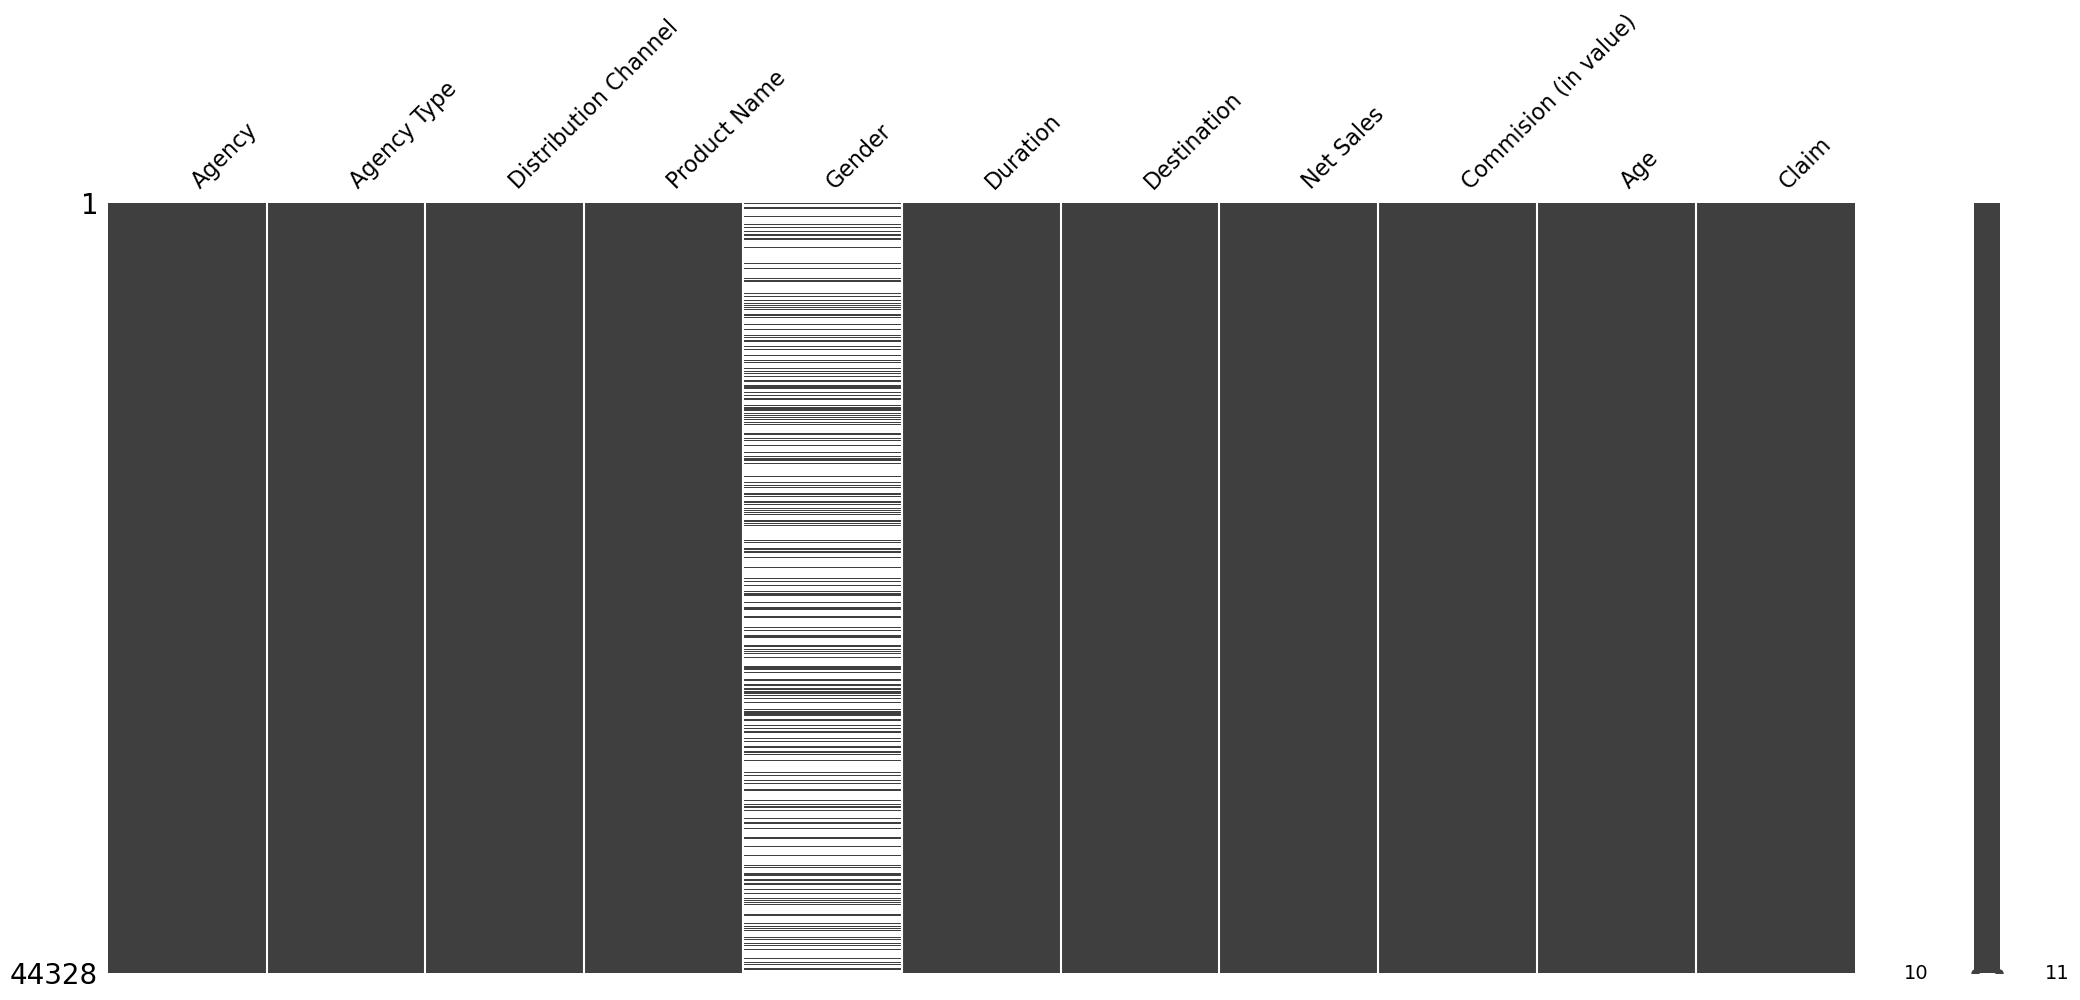

In [7]:
ms.matrix(df)

In [ ]:
xxx

In [ ]:
#pip install skrub

In [ ]:
# from skrub import TableReport
# report = TableReport(df)
# report

Processing column  11 / 11


<TableReport: use .open() to display>

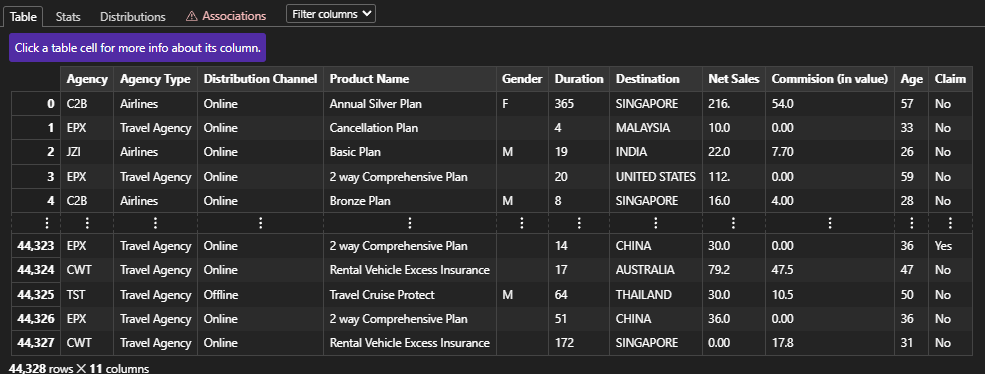
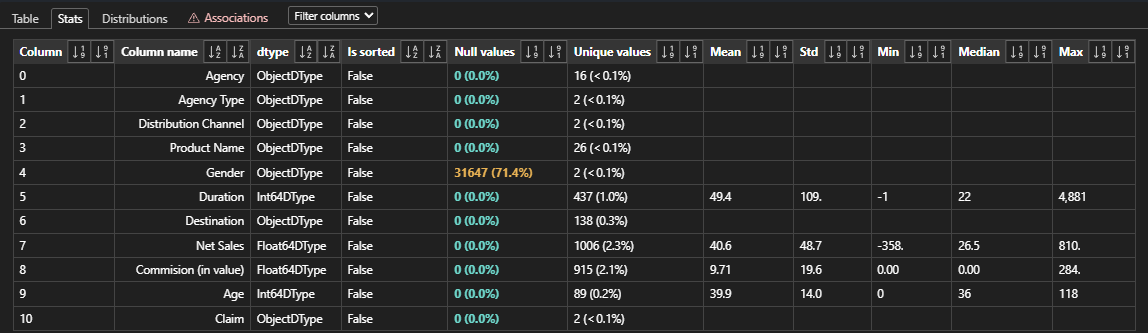
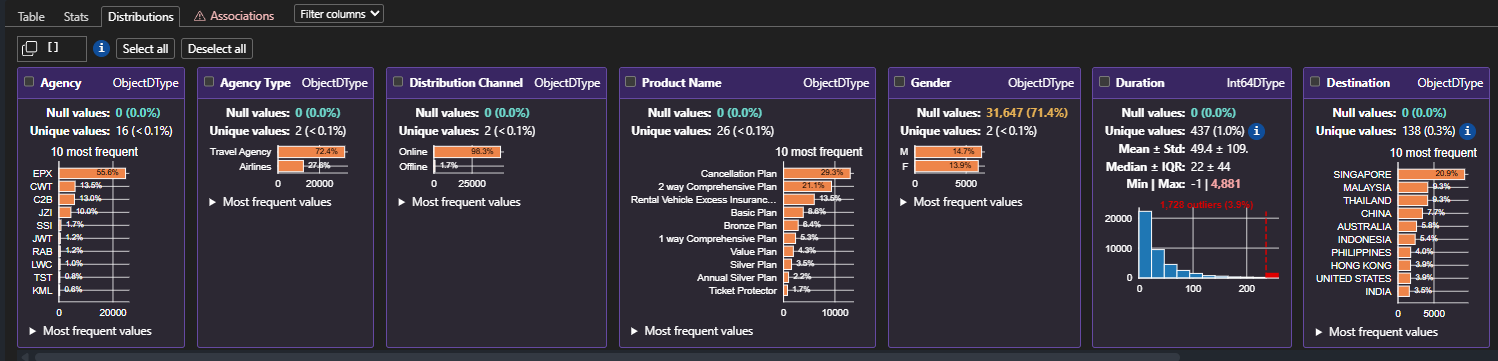
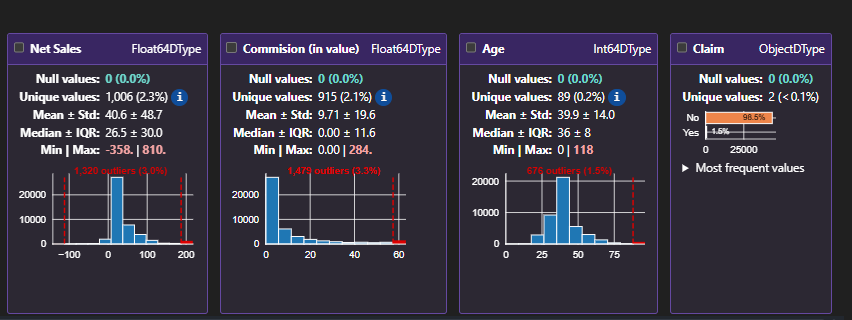


From the table report, we can conclude that:
- EXP is the most used agency
- Travel Agency is the more used than Airlines agency
- The users tipically uses travel insurance that are Online
- The users tipically uses the travel insurance for Cancellation plan and 2 way comprehensive plan
- There are 71.4% of data missing in the `Gender` column, so it is save to drop the column
- There are values from the `Duration` and `Net Sales` column that has a negative value. Do an analysis of why there is that data.

In [ ]:
df.drop(columns = "Gender", inplace = True)

#### **4.2.1. Duplicate Detection**

In [ ]:
df.duplicated().sum()

np.int64(5004)

In [ ]:
df[df.duplicated()]

Agency    Agency Type Distribution Channel  \
331      EPX  Travel Agency               Online   
360      EPX  Travel Agency               Online   
473      EPX  Travel Agency               Online   
488      EPX  Travel Agency               Online   
636      EPX  Travel Agency               Online   
...      ...            ...                  ...   
44309    EPX  Travel Agency               Online   
44311    CWT  Travel Agency               Online   
44313    EPX  Travel Agency               Online   
44315    EPX  Travel Agency               Online   
44321    EPX  Travel Agency               Online   

                          Product Name  Duration Destination  Net Sales  \
331                  Cancellation Plan         2   SINGAPORE       10.0   
360                  Cancellation Plan         6    MALAYSIA       10.0   
473                  Cancellation Plan        11    MALAYSIA       10.0   
488                  Cancellation Plan         2   SINGAPORE       10.0   
636           1 way Comprehensive Plan         3    MALAYSIA       20.0   
...                                ...       ...         ...        ...   
44309         2 way Comprehensive Plan        49    VIET NAM       20.0   
44311  Rental Vehicle Excess Insurance         5    THAILAND       29.7   
44313                Cancellation Plan         5       CHINA       14.0   
44315         1 way Comprehensive Plan         5    THAILAND       20.0   
44321                Cancellation Plan         4       ITALY       10.0   

       Commision (in value)  Age Claim  
331                    0.00   36    No  
360                    0.00   36    No  
473                    0.00   36    No  
488                    0.00   36    No  
636                    0.00   36    No  
...                     ...  ...   ...  
44309                  0.00   36    No  
44311                 17.82   38    No  
44313                  0.00   36    No  
44315                  0.00   36    No  
44321                  0.00   36    No  

[5004 rows x 10 columns]

Duplicated datas will not be drop because there is a chance that the same instance happened more than once. This can not be confirmed nor denied because there is no primary key in the data.

#### **4.2.2. Outlier Detection and Handling**

Although outliers can be deteceted from the TableReport module in the skrub module, it can be more visualized with boxplots.

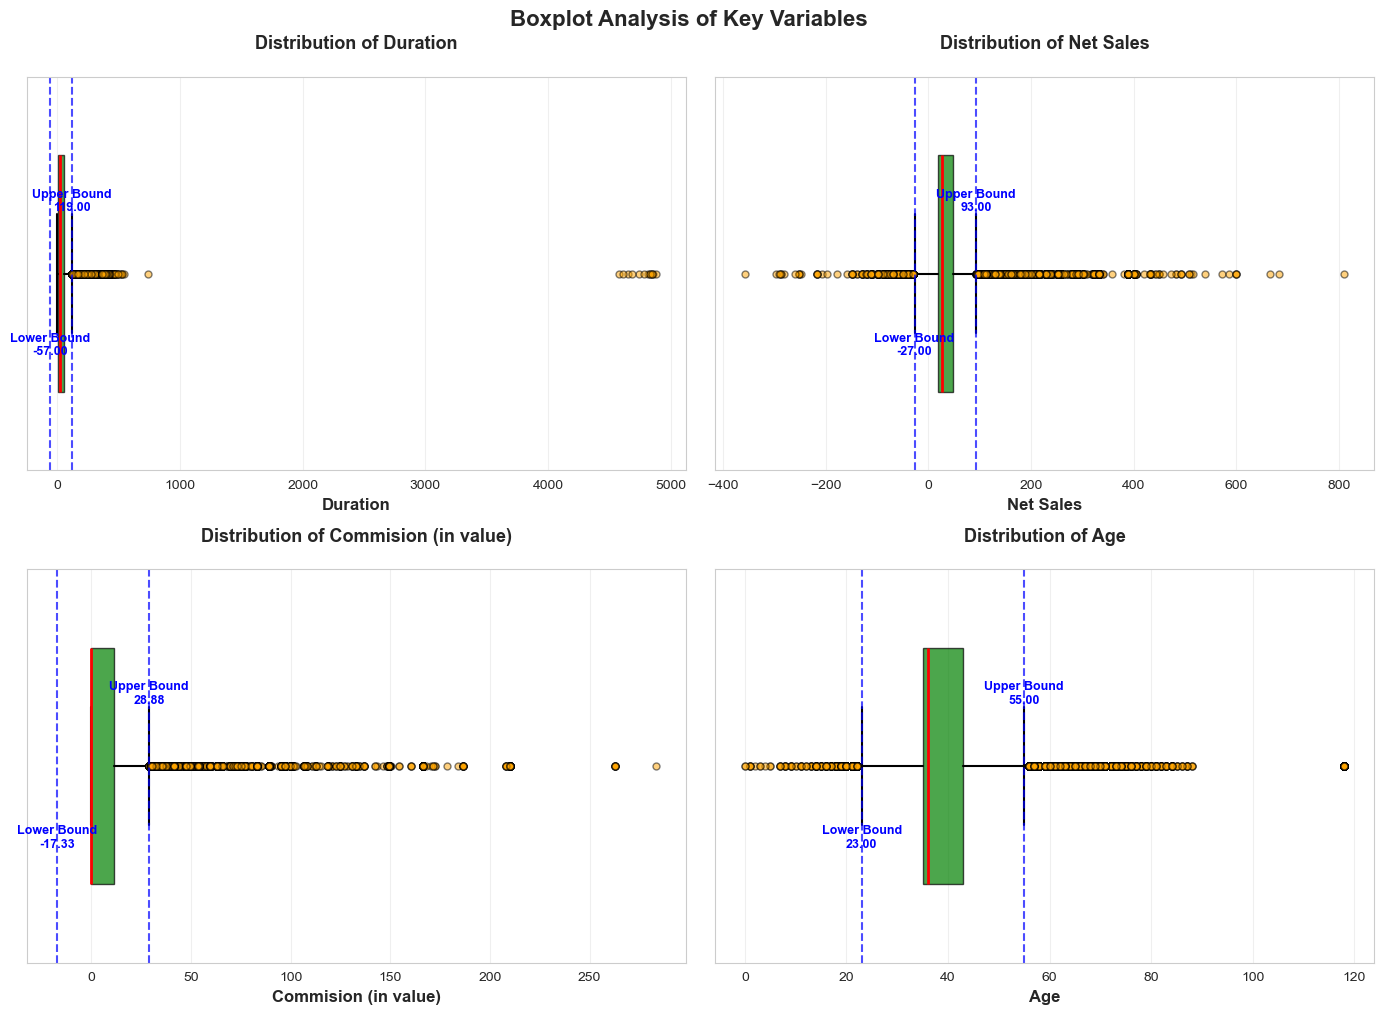

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Columns to plot
columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]

# Create horizontal boxplots
for idx, col in enumerate(columns):
    # Create boxplot
    bp = axes[idx].boxplot(df[col].dropna(), 
                           vert=False,  # Horizontal orientation
                           patch_artist=True,  # Enable color filling
                           widths=0.6,
                           medianprops=dict(color='red', linewidth=2),  # Red median line
                           boxprops=dict(facecolor='green', alpha=0.7),  # Green box
                           whiskerprops=dict(color='black', linewidth=1.5),
                           capprops=dict(color='black', linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='orange', 
                                         markersize=5, alpha=0.5))
    
    # Calculate quartiles and IQR for annotations
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Add annotations for bounds
    axes[idx].axvline(lower_bound, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
    axes[idx].axvline(upper_bound, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Annotate lower bound (bottom)
    axes[idx].text(lower_bound, 0.85, f'Lower Bound\n{lower_bound:.2f}', 
                   ha='center', va='top', fontsize=9, color='blue', fontweight='bold')
    
    # Annotate upper bound (top)
    axes[idx].text(upper_bound, 1.15, f'Upper Bound\n{upper_bound:.2f}', 
                   ha='center', va='bottom', fontsize=9, color='blue', fontweight='bold')
    
    # Set labels and title
    axes[idx].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('')
    axes[idx].set_title(f'Distribution of {col}', fontsize=13, fontweight='bold', pad=20)
    axes[idx].set_yticks([])
    axes[idx].grid(axis='x', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.suptitle('Boxplot Analysis of Key Variables', fontsize=16, fontweight='bold', y=1.01)
plt.show()

From the boxplots we can conclude that:
- There is a gap between the data under 1000 and over 4000 in the `Duration` column. From a bussiness understanding stand point, it is mostly unlikely that the duration of trip exceeds 4000 days. The wise thing to do is to remove all of the data with the `Duration` more than 4000 to reduce the chances of misleading feature importance. This also applies to the `Age` column. It is better to remove the `Age` above 100. The oldest human being that's recorded in the modern times only lived up till 116 years old ([source](https://en.wikipedia.org/wiki/List_of_oldest_living_people))
- There is also negative data valeus in the `Duration` column which doesn't make sense, therefore it is best to remove it
- While there is outliers in `Commision` and `Net Sales`, it is plausible that they are factual data. Even though it's considered outliers, it will not be removed.
- There is alot of negative values in `Net Sales` data. Although it seems wierd, negative values can represent as a loss from product sales so it is not removed

In [ ]:
#Only taking duratiom below 4000 days
df= df[(df["Duration"] < 4000) & (df["Duration"] > 0)]

#Only taking age below 100
df= df[df["Age"] < 100]

#### **4.2.3. Imbalance Detection and Encoding Label**

In [ ]:
df["Claim"].value_counts(normalize = True)

Claim
No     0.984637
Yes    0.015363
Name: proportion, dtype: float64

Insight : There is more instances where the insurance is not claimed than claimed

In [ ]:
claim_map = {
    "No": 0,
    "Yes": 1
}
df['Claim'] = df['Claim'].map(claim_map)

#### **4.2.4. Columns According to Data Type**

In [ ]:
num_cols = df.drop(columns = "Claim").select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns

display(num_cols, cat_cols)


Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

## **5. Define X and y**

In [ ]:
X = df.drop(columns = "Claim")
y = df["Claim"]
display(X.head(), y.head())

Agency    Agency Type Distribution Channel              Product Name  \
0    C2B       Airlines               Online        Annual Silver Plan   
1    EPX  Travel Agency               Online         Cancellation Plan   
2    JZI       Airlines               Online                Basic Plan   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan   
4    C2B       Airlines               Online               Bronze Plan   

   Duration    Destination  Net Sales  Commision (in value)  Age  
0       365      SINGAPORE      216.0                  54.0   57  
1         4       MALAYSIA       10.0                   0.0   33  
2        19          INDIA       22.0                   7.7   26  
3        20  UNITED STATES      112.0                   0.0   59  
4         8      SINGAPORE       16.0                   4.0   28

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [ ]:
X.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

## **6. Data Splitting (train_test_split)**

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0,
                                                    stratify=y
                                                    )

## **7. Feature Engineering**

Because there is no NaN data, imputing will not be necessary. What will be done is scaling the data. For the numerical columns, we will use the robust scaler because all of the numerical data is distributed abnormally (non parametric). For the categorical columns, we will use the binary encoder for `Agency`, `Product Name`, `Destination` because simply there are to many unique data values. `Agency Type`, `Distribution Channel` will be encoded with the onehot encoder.

In [ ]:
preprocess_transformer = ColumnTransformer(transformers = [
    ("onehot", OneHotEncoder(drop="first", sparse_output = False), ['Agency Type', 'Distribution Channel']),
    ("binary", BinaryEncoder(), ['Product Name', 'Agency', 'Destination']),
    ("robust", RobustScaler(), num_cols)
],
remainder = 'passthrough') #Sisa kolom yang ga dispesifikasi ga diapa2in

preprocess_transformer.set_output(transform = "pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Product Name', 'Agency', 'Destination']),
                                ('robust', RobustScaler(),
                                 Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])

## **8. Model Benchmarking**

For the analysis, fbeta score will be used as the scoring measurement with the beta being sqrt(fn_cost/fp_cost). The recall score has a bigger importance ratio than the presicion.

In [ ]:
fn_cost = 9720
fp_cost = 500
beta_value = np.sqrt(fn_cost/fp_cost)

In [ ]:
fbeta_scorer = make_scorer(fbeta_score, beta = beta_value)

### **8.1. Model Selection with Default configuration**

In [ ]:
# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

# bagging
bagging = BaggingClassifier(random_state=0)

# random forest
rf = RandomForestClassifier(random_state=0)

#gradient boosting
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

list_model = [logreg, knn, tree, bagging, 
              rf, adaboost, gboost, xgboost]

In [ ]:
# Cross Validation
cv_all = []
cv_mean = []
cv_std = []

for model in list_model:
    # define pipe_model
    pipe_model = Pipeline([
        ("Preprocessing", preprocess_transformer),
        ("Modeling", model)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator=pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= fbeta_scorer
    )

    cv_all.append(cv_score.round(4))
    cv_mean.append(cv_score.mean())
    cv_std.append(cv_score.std())

d:\Data\miniconda3\envs\base_copy\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["fbeta_all"] = cv_all
df_cv["fbeta_mean"] = cv_mean
df_cv["fbeta_std"] = cv_std

df_cv.sort_values(["fbeta_mean", "fbeta_std"], 
                  ascending=[False, True])

model  \
2             DecisionTreeClassifier(random_state=0)   
3                  BaggingClassifier(random_state=0)   
4             RandomForestClassifier(random_state=0)   
6         GradientBoostingClassifier(random_state=0)   
7  XGBClassifier(base_score=None, booster=None, c...   
1                             KNeighborsClassifier()   
0                 LogisticRegression(random_state=0)   
5                 AdaBoostClassifier(random_state=0)   

                                  fbeta_all  fbeta_mean  fbeta_std  
2   [0.0832, 0.056, 0.0823, 0.0836, 0.0644]    0.073872   0.011508  
3  [0.0291, 0.0193, 0.0384, 0.0292, 0.0194]    0.027065   0.007145  
4  [0.0098, 0.0097, 0.0097, 0.0196, 0.0389]    0.017531   0.011358  
6           [0.0, 0.0098, 0.0, 0.0098, 0.0]    0.003927   0.004809  
7              [0.0, 0.0, 0.0, 0.0104, 0.0]    0.002074   0.004147  
1              [0.0, 0.0098, 0.0, 0.0, 0.0]    0.001961   0.003921  
0                 [0.0, 0.0, 0.0, 0.0, 0.0]    0.000000   0.000000  
5                 [0.0, 0.0, 0.0, 0.0, 0.0]    0.000000   0.000000

Insight:
- Decision Tree model has thebiggest f_beta mean, therefore it is the most accurate
- XGBClassifier has a relatively low standard deviation, therefore it is the most stable

In this analysis, both decision tree and xgbclassifier method is going to be tuned and compared to see which one is better.

#### **8.1. Decision Tree**

In [ ]:
pipe_base_dtree = Pipeline(steps = [
    ("preprocessing", preprocess_transformer),
    ("modeling", DecisionTreeClassifier(random_state=0))
])

pipe_base_dtree.fit(X_train, y_train)
y_train_base = pipe_base_dtree.predict(X_train)
y_test_base= pipe_base_dtree.predict(X_test)

#hitung train dan test recall
train_fbeta_base = fbeta_score(y_train, y_train_base, beta = beta_value)
test_fbeta_base = fbeta_score(y_test, y_test_base, beta = beta_value)

print(f"Train fbeta (base model): {train_fbeta_base}")
print(f"Test fbeta (base model): {test_fbeta_base}")

Train fbeta (base model): 0.9037079979159481
Test fbeta (base model): 0.07379167930222819


The Decision Tree base model has a fbeta train score = 0.90 and fbeta test score = 0.07. This means that the model is very overfitted. A plausible explanation is because the imbalance in the data.

#### **8.2. XGBoost**

In [ ]:
pipe_base_xgboost = Pipeline(steps = [
    ("preprocessing", preprocess_transformer),
    ("modeling", XGBClassifier(random_state=0))
])

pipe_base_xgboost.fit(X_train, y_train)
y_train_base = pipe_base_xgboost.predict(X_train)
y_test_base= pipe_base_xgboost.predict(X_test)

#hitung train dan test recall
train_fbeta_base = fbeta_score(y_train, y_train_base, beta = beta_value)
test_fbeta_base = fbeta_score(y_test, y_test_base, beta = beta_value)

print(f"Train fbeta (base model): {train_fbeta_base}")
print(f"Test fbeta (base model): {test_fbeta_base}")

Train fbeta (base model): 0.120902436976714
Test fbeta (base model): 0.0


The XGBoost base model has a fbeta train score = 0.12 and fbeta test score = 0.00. This means that the model is very overfitted. A plausible explanation is because the imbalance in the data.

## **9. Hyperparameter Tuning**

Because the positive data is so much bigger than the negative data in quantity, doing undersampling will not be feasible because there will be a lot of lost data. Therefore the resampling technique that will be used is ROS and SMOTE because it's the oversampling type

In [ ]:
# Define resampling methods
ros = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)


### **9.1. Decision Tree**

In [ ]:
# Create pipeline with resampling
pipe_model_dtree = Pipeline([
    ("preprocessing", preprocess_transformer),
    ("resampling", None),  # Will be tuned
    ("dtree", DecisionTreeClassifier(random_state=0)
    )
])

pipe_model_dtree

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
                ('resampling', None),
                ('dtree', DecisionTreeClassifier(random_state=0))])

In [ ]:
# Define parameter space

hyperparam_dtree = {
    "resampling" : [ros, smote], #nearmiss sama rus ga dipake karna kita amu nambahin data label 1
    "dtree__max_depth": range(2,11), #max_depth kecil mengurangi overfitting
    "dtree__min_samples_leaf": range(8,31), #min_samples_leaf besar mengurangi overfitting
    "dtree__min_samples_split": range(8,31), #besar untuk mengurangi overfitting
    "dtree__class_weight": [None, "balanced"]
}

In [ ]:
randomsearch_dtree = RandomizedSearchCV(
    estimator = pipe_model_dtree,
    param_distributions= hyperparam_dtree,
    n_iter = 200,
    random_state = 0,
    cv = 5,
    n_jobs = -1,
    scoring = fbeta_scorer
)

randomsearch_dtree

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Product '
                                                                                'Name',
                                                                                'Agency',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Comm...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'dtree__class_weight': [None,
                                                                'balanced'],
                                        'dtree__max_depth': range(2, 11),
                                        'dtree__min_samples_leaf': range(8, 31),
                                        'dtree__min_samples_split': range(8, 31),
                                        'resampling': [RandomOverSampler(random_state=0),
                                                       SMOTE(random_state=0)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=4.409081537009721))

In [ ]:
randomsearch_dtree.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Product '
                                                                                'Name',
                                                                                'Agency',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Comm...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'dtree__class_weight': [None,
                                                                'balanced'],
                                        'dtree__max_depth': range(2, 11),
                                        'dtree__min_samples_leaf': range(8, 31),
                                        'dtree__min_samples_split': range(8, 31),
                                        'resampling': [RandomOverSampler(random_state=0),
                                                       SMOTE(random_state=0)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=4.409081537009721))

In [ ]:
randomsearch_dtree.best_score_

np.float64(0.46001154838741665)

In [ ]:
randomsearch_dtree.best_params_

{'resampling': RandomOverSampler(random_state=0),
 'dtree__min_samples_split': 23,
 'dtree__min_samples_leaf': 25,
 'dtree__max_depth': 3,
 'dtree__class_weight': 'balanced'}

In [ ]:
pipe_tuned_dtree = randomsearch_dtree.best_estimator_
pipe_tuned_dtree

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
                ('resampling', RandomOverSampler(random_state=0)),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_leaf=25,
                                        min_samples_split=23,
                                        random_state=0))])

In [ ]:
# base model-nya overfitting atau nggak
pipe_tuned_dtree.fit(X_train, y_train)
y_train_pred = pipe_tuned_dtree.predict(X_train)
y_test_pred = pipe_tuned_dtree.predict(X_test)

#hitung train dan test fbeta
train_fbeta = fbeta_score(y_train, y_train_pred, beta = beta_value)
test_fbeta = fbeta_score(y_test, y_test_pred, beta = beta_value)

print(f"Train fbeta Dtree: {train_fbeta}")
print(f"Test fbeta Dtree: {test_fbeta}")

Train fbeta Dtree: 0.46970488823991324
Test fbeta Dtree: 0.4504139602724058


In [ ]:
y_train

2577     0
4951     0
25638    0
1081     0
33564    0
        ..
11667    0
27806    0
24505    0
18804    0
4996     0
Name: Claim, Length: 34888, dtype: int64

In [ ]:
y_test

26415    0
11138    0
22089    0
85       0
33182    0
        ..
6634     0
2855     0
24523    0
36958    0
30507    0
Name: Claim, Length: 8722, dtype: int64

In [ ]:
X_train.duplicated().sum()

np.int64(3415)

In [ ]:
X_train.shape

(34888, 9)

After tuning is done in the decision tree model d, the fbeta score with the train and test data is relatively similiar at ~0.45

### **9.2. XGBoost**

In [ ]:
# Create pipeline with resampling
pipe_model_xgboost = Pipeline([
    ("preprocessing", preprocess_transformer),
    ("resampling", None),  # Will be tuned
    ("xgboost", XGBClassifier(random_state=0)
    )
])

pipe_model_xgboost

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))]...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
y.value_counts(normalize=True)

Claim
0    0.984637
1    0.015363
Name: proportion, dtype: float64

In [ ]:
0.984637 / 0.015363

64.09145349215648

In [ ]:
hyperparam_xgboost = {
    # "resampling" : [ros, smote],
    "xgboost__n_estimators": range(50,100),
    "xgboost__max_depth": range(3,20), 
    "xgboost__learning_rate": np.logspace(np.log10(0.01), np.log10(0.20)),
    "xgboost__scale_pos_weight": range(50,80), 
    "xgboost__min_child_weight": range(20,40),
    "xgboost__max_delta_step": [1,3,5]
}

In [ ]:
randomsearch_xgboost = RandomizedSearchCV(
    estimator = pipe_model_xgboost,
    param_distributions= hyperparam_xgboost,
    n_iter = 200,
    random_state = 0,
    cv = 5,
    n_jobs = -1,
    scoring = fbeta_scorer
)

randomsearch_xgboost

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Product '
                                                                                'Name',
                                                                                'Agency',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Comm...
       0.11536267, 0.12263571, 0.13036727, 0.13858627, 0.14732343,
       0.15661143, 0.166485  , 0.17698103, 0.1881388 , 0.2       ]),
                                        'xgboost__max_delta_step': [1, 3, 5],
                                        'xgboost__max_depth': range(3, 20),
                                        'xgboost__min_child_weight': range(20, 40),
                                        'xgboost__n_estimators': range(50, 100),
                                        'xgboost__scale_pos_weight': range(50, 80)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=4.409081537009721))

In [ ]:
randomsearch_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Product '
                                                                                'Name',
                                                                                'Agency',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Comm...
       0.11536267, 0.12263571, 0.13036727, 0.13858627, 0.14732343,
       0.15661143, 0.166485  , 0.17698103, 0.1881388 , 0.2       ]),
                                        'xgboost__max_delta_step': [1, 3, 5],
                                        'xgboost__max_depth': range(3, 20),
                                        'xgboost__min_child_weight': range(20, 40),
                                        'xgboost__n_estimators': range(50, 100),
                                        'xgboost__scale_pos_weight': range(50, 80)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=4.409081537009721))

In [ ]:
pipe_tuned_xgboost = randomsearch_xgboost.best_estimator_
pipe_tuned_xgboost

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))]...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.011300645858107587),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=3, max_leaves=None,
                               min_child_weight=36, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=90, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
randomsearch_xgboost.best_score_

np.float64(0.45689520055666755)

In [ ]:
randomsearch_xgboost.best_params_

{'xgboost__scale_pos_weight': 63,
 'xgboost__n_estimators': 90,
 'xgboost__min_child_weight': 36,
 'xgboost__max_depth': 3,
 'xgboost__max_delta_step': 1,
 'xgboost__learning_rate': np.float64(0.011300645858107587)}

In [ ]:
# base model-nya overfitting atau nggak
pipe_tuned_xgboost.fit(X_train, y_train)
y_train_pred = pipe_tuned_xgboost.predict(X_train)
y_test_pred = pipe_tuned_xgboost.predict(X_test)

#hitung train dan test fbeta
train_fbeta = fbeta_score(y_train, y_train_pred, beta = beta_value)
test_fbeta = fbeta_score(y_test, y_test_pred, beta = beta_value)

print(f"Train fbeta xgboost: {train_fbeta}")
print(f"Test fbeta xgboost: {test_fbeta}")

Train fbeta xgboost: 0.4709725650032259
Test fbeta xgboost: 0.46609752598028165


In [ ]:
beta_value

np.float64(4.409081537009721)

After tuning is done in the xgboost model , the fbeta score with the train and test data is relatively similiar at ~0.47

## **10. Model Checking**

a. KLASIFIKASI: cost benefit analysis -> confusion matrix

In [ ]:
fn_cost = 9720
fp_cost = 500
tp_benefit = 0

In [ ]:
# Define cost-benefit function
def summarize_loss(confusion_matrix, fp_cost, fn_cost, tp_benefit):
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]
    
    total_samples = tn + fp + fn + tp
    total_fp_cost = fp * -1 * fp_cost
    total_fn_cost = fn * -1 * fn_cost
    total_tp_benefit = tp * tp_benefit
    
    total_benefit = total_fp_cost + total_fn_cost + total_tp_benefit
    
    summary = f"""
    ---Impact Summary---

        Total Samples: {total_samples}
        Total False Positive Cost: ${total_fp_cost:,.2f}
        Total False Negative Cost: ${total_fn_cost:,.2f}
        Total True Positive Benefit: ${total_tp_benefit:,.2f}
        Total Benefit: ${total_benefit:,.2f}
        
    ---------------
    """
    
    return summary

#### **10.1. Decision Tree**

In [ ]:
y_test_pred_base_dtree = pipe_base_dtree.predict(X_test)

In [ ]:
y_test_pred_tuned_dtree = pipe_tuned_dtree.predict(X_test)

In [ ]:
#Calculate confusion matrices
conf_matrix_base = confusion_matrix(y_test, y_test_pred_base_dtree)
conf_matrix_tuned = confusion_matrix(y_test, y_test_pred_tuned_dtree)

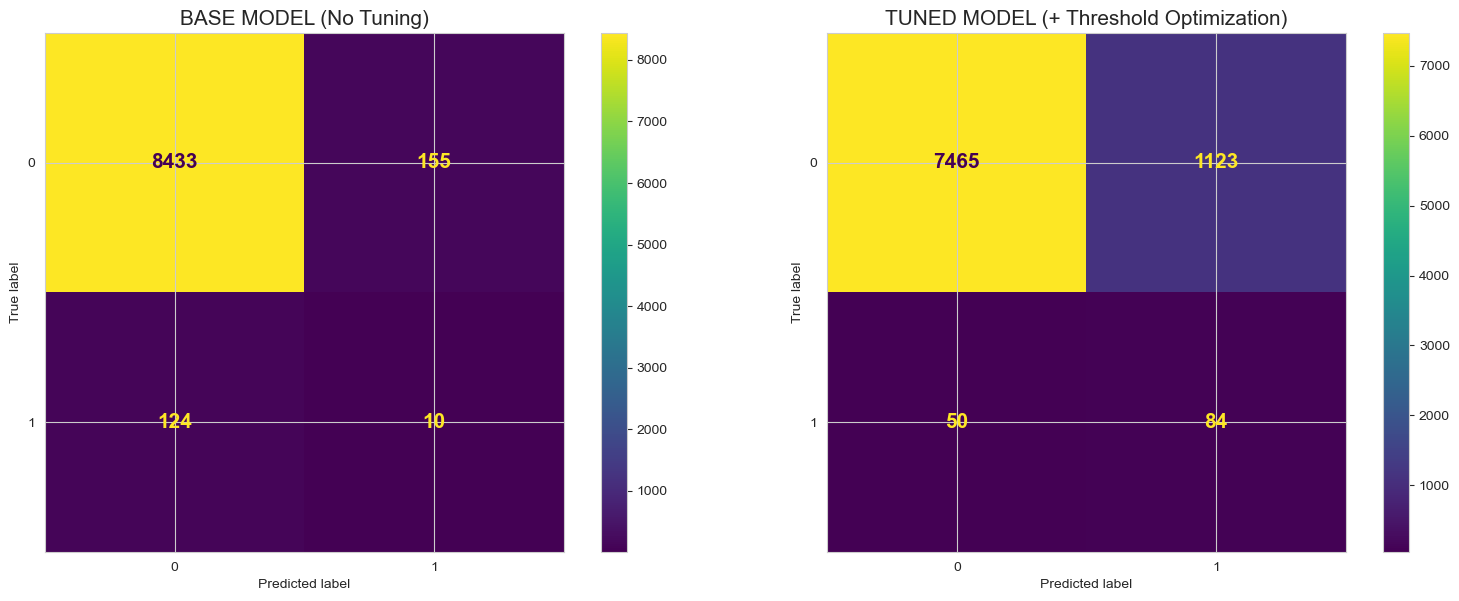

In [ ]:
# Visualize confusion matrices
figure, axes = plt.subplots(ncols=2, figsize=(16, 6))

text_format = {'size': 15, 'weight': 'bold'}

ConfusionMatrixDisplay(conf_matrix_base).plot(ax=axes[0], text_kw=text_format)
axes[0].set_title("BASE MODEL (No Tuning)", fontsize=15)

ConfusionMatrixDisplay(conf_matrix_tuned).plot(ax=axes[1], text_kw=text_format)
axes[1].set_title("TUNED MODEL (+ Threshold Optimization)", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# Compare business impact
print("=" * 50)
print("BASE MODEL DECISION TREE (No Tuning)")
print("=" * 50)
print(summarize_loss(conf_matrix_base, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

print("\n" + "=" * 50)
print("TUNED MODEL (+ Threshold Optimization)")
print("=" * 50)
print(summarize_loss(conf_matrix_tuned, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

BASE MODEL DECISION TREE (No Tuning)

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-77,500.00
        Total False Negative Cost: $-1,205,280.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,282,780.00

    ---------------
    

TUNED MODEL (+ Threshold Optimization)

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-561,500.00
        Total False Negative Cost: $-486,000.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,047,500.00

    ---------------
    


In [ ]:
# Benchmark: No model (predict all will not claim)
print("=" * 50)
print("NO MODEL: Predict all customers will NOT claim")
print("=" * 50)
y_no_model = np.zeros(y_test.shape[0])
conf_matrix_no_model = confusion_matrix(y_test, y_no_model)
print(summarize_loss(conf_matrix_no_model, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

NO MODEL: Predict all customers will NOT claim

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $0.00
        Total False Negative Cost: $-1,302,480.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,302,480.00

    ---------------
    


In [ ]:
# Benchmark: No model (predict all will claim)
print("=" * 50)
print("NO MODEL: Predict all customers WILL claim")
print("=" * 50)
y_all_claim = np.ones(y_test.shape[0])
conf_matrix_all_claim = confusion_matrix(y_test, y_all_claim)
print(summarize_loss(conf_matrix_all_claim, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

NO MODEL: Predict all customers WILL claim

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-4,294,000.00
        Total False Negative Cost: $0.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-4,294,000.00

    ---------------
    


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, y_test_pred_tuned_dtree)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      8588
           1       0.07      0.63      0.13       134

    accuracy                           0.87      8722
   macro avg       0.53      0.75      0.53      8722
weighted avg       0.98      0.87      0.91      8722



#### **10.2. XGBoost**

In [ ]:
y_test_pred_base_xgboost = pipe_base_xgboost.predict(X_test)

In [ ]:
y_test_pred_tuned_xgboost = pipe_tuned_xgboost.predict(X_test)

In [ ]:
#Calculate confusion matrices
conf_matrix_base = confusion_matrix(y_test, y_test_pred_base_xgboost)
conf_matrix_tuned = confusion_matrix(y_test, y_test_pred_tuned_xgboost)

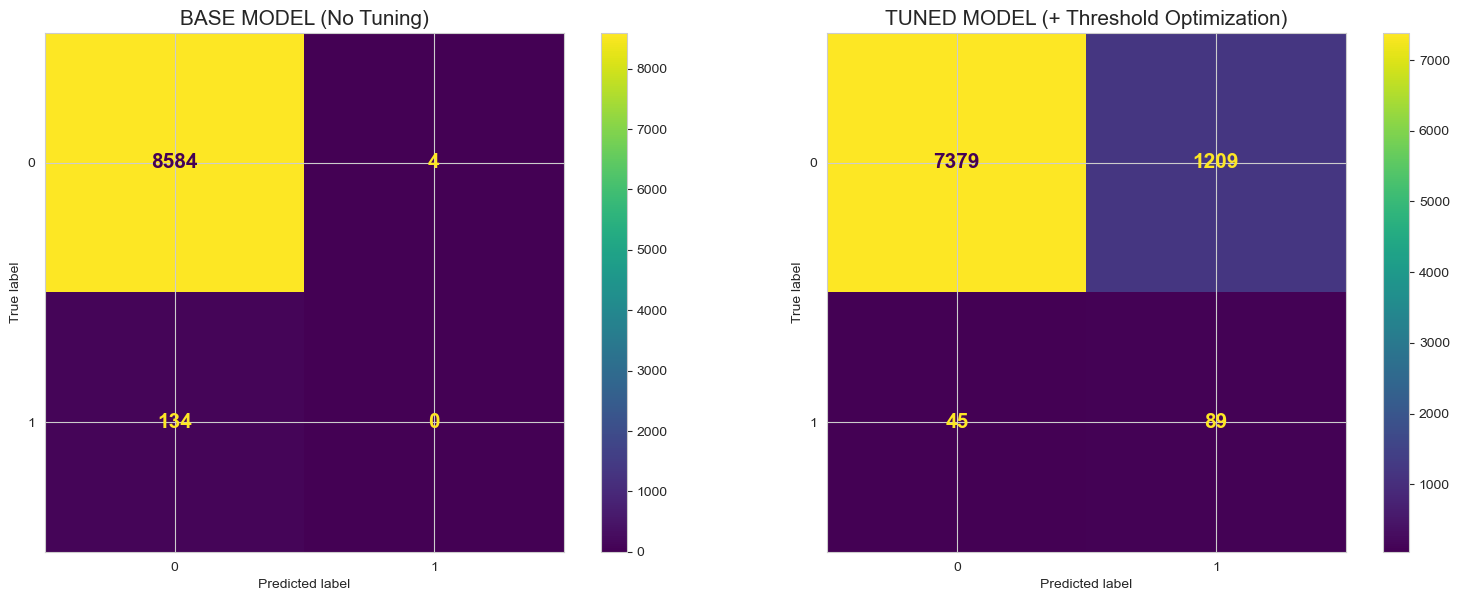

In [ ]:
# Visualize confusion matrices
figure, axes = plt.subplots(ncols=2, figsize=(16, 6))

text_format = {'size': 15, 'weight': 'bold'}

ConfusionMatrixDisplay(conf_matrix_base).plot(ax=axes[0], text_kw=text_format)
axes[0].set_title("BASE MODEL (No Tuning)", fontsize=15)

ConfusionMatrixDisplay(conf_matrix_tuned).plot(ax=axes[1], text_kw=text_format)
axes[1].set_title("TUNED MODEL (+ Threshold Optimization)", fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# Compare business impact
print("=" * 50)
print("BASE MODEL (No Tuning)")
print("=" * 50)
print(summarize_loss(conf_matrix_base, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

print("\n" + "=" * 50)
print("TUNED MODEL (+ Threshold Optimization)")
print("=" * 50)
print(summarize_loss(conf_matrix_tuned, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

BASE MODEL DECISION TREE (No Tuning)

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-2,000.00
        Total False Negative Cost: $-1,302,480.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,304,480.00

    ---------------
    

TUNED MODEL (+ Threshold Optimization)

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-604,500.00
        Total False Negative Cost: $-437,400.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,041,900.00

    ---------------
    


In [ ]:
# Benchmark: No model (predict all will not claim)
print("=" * 50)
print("NO MODEL: Predict all customers will NOT claim")
print("=" * 50)
y_no_model = np.zeros(y_test.shape[0])
conf_matrix_no_model = confusion_matrix(y_test, y_no_model)
print(summarize_loss(conf_matrix_no_model, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

NO MODEL: Predict all customers will NOT claim

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $0.00
        Total False Negative Cost: $-1,302,480.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-1,302,480.00

    ---------------
    


In [ ]:
# Benchmark: No model (predict all will claim)
print("=" * 50)
print("NO MODEL: Predict all customers WILL claim")
print("=" * 50)
y_all_claim = np.ones(y_test.shape[0])
conf_matrix_all_claim = confusion_matrix(y_test, y_all_claim)
print(summarize_loss(conf_matrix_all_claim, fp_cost=fp_cost, fn_cost=fn_cost, tp_benefit=tp_benefit))

NO MODEL: Predict all customers WILL claim

    ---Impact Summary---

        Total Samples: 8722
        Total False Positive Cost: $-4,294,000.00
        Total False Negative Cost: $0.00
        Total True Positive Benefit: $0.00
        Total Benefit: $-4,294,000.00

    ---------------
    


In [ ]:
report = classification_report(y_test, y_test_pred_tuned_xgboost)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8588
           1       0.07      0.66      0.12       134

    accuracy                           0.86      8722
   macro avg       0.53      0.76      0.52      8722
weighted avg       0.98      0.86      0.91      8722



### **10.1. Interpretable Model -> shap / lime**

In [ ]:
import joblib
import pickle
import shap

In [ ]:
# Import datetime for systematic file naming
from datetime import datetime
import pickle

# Generate timestamp for file versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
print(f"Timestamp for this session: {timestamp}")

Timestamp for this session: 20251113_1122


#### **10.1.1 DecisionTree**

In [ ]:
pipe_tuned_dtree.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
                ('resampling', RandomOverSampler(random_state=0)),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_leaf=25,
                                        min_samples_split=23,
                                        random_state=0))])

In [ ]:
# Save tuned model with timestamp
model_filename = f"pipe_tuned_dtree{timestamp}.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(pipe_tuned_dtree, f)
print(f"Model saved as: {model_filename}")

Model saved as: pipe_tuned_dtree20251113_1122.pkl


In [ ]:
pipe_tuned = joblib.load("pipe_tuned_dtree20251113_1122.pkl")
pipe_tuned

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
                ('resampling', RandomOverSampler(random_state=0)),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_leaf=25,
                                        min_samples_split=23,
                                        random_state=0))])

In [ ]:
pipe_tuned.steps

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(drop='first',
                                                 sparse_output=False),
                                   ['Agency Type', 'Distribution Channel']),
                                  ('binary', BinaryEncoder(),
                                   ['Product Name', 'Agency', 'Destination']),
                                  ('robust', RobustScaler(),
                                   Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
 ('resampling', RandomOverSampler(random_state=0)),
 ('dtree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                         min_samples_leaf=25, min_samples_split=23,
                         random_state=0))]

In [ ]:
dtree_model = pipe_tuned['dtree']
dtree_model

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=25, min_samples_split=23,
                       random_state=0)

In [ ]:
preprocess_tuned = pipe_tuned["preprocessing"]
preprocess_tuned

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Product Name', 'Agency', 'Destination']),
                                ('robust', RobustScaler(),
                                 Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])

In [ ]:
X_trans = preprocess_tuned.transform(X)
X_trans

onehot__Agency Type_Travel Agency  onehot__Distribution Channel_Online  \
0                                    0.0                                  1.0   
1                                    1.0                                  1.0   
2                                    0.0                                  1.0   
3                                    1.0                                  1.0   
4                                    0.0                                  1.0   
...                                  ...                                  ...   
44323                                1.0                                  1.0   
44324                                1.0                                  1.0   
44325                                1.0                                  0.0   
44326                                1.0                                  1.0   
44327                                1.0                                  1.0   

       binary__Product Name_0  binary__Product Name_1  binary__Product Name_2  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       1   
4                           0                       0                       1   
...                       ...                     ...                     ...   
44323                       0                       0                       1   
44324                       0                       0                       1   
44325                       0                       1                       1   
44326                       0                       0                       1   
44327                       0                       0                       1   

       binary__Product Name_3  binary__Product Name_4  binary__Agency_0  \
0                           0                       1                 0   
1                           1                       0                 0   
2                           1                       1                 0   
3                           0                       0                 0   
4                           0                       1                 0   
...                       ...                     ...               ...   
44323                       0                       0                 0   
44324                       1                       1                 0   
44325                       1                       1                 1   
44326                       0                       0                 0   
44327                       1                       1                 0   

       binary__Agency_1  binary__Agency_2  ...  binary__Destination_2  \
0                     0                 0  ...                      0   
1                     0                 1  ...                      0   
2                     0                 1  ...                      0   
3                     0                 1  ...                      0   
4                     0                 0  ...                      0   
...                 ...               ...  ...                    ...   
44323                 0                 1  ...                      0   
44324                 1                 0  ...                      0   
44325                 0                 1  ...                      0   
44326                 0                 1  ...                      0   
44327                 1                 0  ...                      0   

       binary__Destination_3  binary__Destination_4  binary__Destination_5  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                     

In [ ]:
X_transform_resampled, y_resampled = pipe_tuned["resampling"].fit_resample(X_trans, y)
X_transform_resampled

onehot__Agency Type_Travel Agency  onehot__Distribution Channel_Online  \
0                                    0.0                                  1.0   
1                                    1.0                                  1.0   
2                                    0.0                                  1.0   
3                                    1.0                                  1.0   
4                                    0.0                                  1.0   
...                                  ...                                  ...   
85875                                0.0                                  1.0   
85876                                1.0                                  1.0   
85877                                0.0                                  1.0   
85878                                1.0                                  1.0   
85879                                0.0                                  1.0   

       binary__Product Name_0  binary__Product Name_1  binary__Product Name_2  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       1   
4                           0                       0                       1   
...                       ...                     ...                     ...   
85875                       0                       0                       0   
85876                       1                       0                       1   
85877                       0                       0                       0   
85878                       0                       0                       1   
85879                       0                       0                       0   

       binary__Product Name_3  binary__Product Name_4  binary__Agency_0  \
0                           0                       1                 0   
1                           1                       0                 0   
2                           1                       1                 0   
3                           0                       0                 0   
4                           0                       1                 0   
...                       ...                     ...               ...   
85875                       1                       1                 0   
85876                       1                       0                 0   
85877                       0                       1                 0   
85878                       1                       1                 0   
85879                       0                       1                 0   

       binary__Agency_1  binary__Agency_2  ...  binary__Destination_2  \
0                     0                 0  ...                      0   
1                     0                 1  ...                      0   
2                     0                 1  ...                      0   
3                     0                 1  ...                      0   
4                     0                 0  ...                      0   
...                 ...               ...  ...                    ...   
85875                 0                 1  ...                      0   
85876                 1                 0  ...                      0   
85877                 0                 0  ...                      0   
85878                 1                 0  ...                      0   
85879                 0                 0  ...                      0   

       binary__Destination_3  binary__Destination_4  binary__Destination_5  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                     

In [ ]:
feature_names = X_transform_resampled.columns
feature_names

Index(['onehot__Agency Type_Travel Agency',
       'onehot__Distribution Channel_Online', 'binary__Product Name_0',
       'binary__Product Name_1', 'binary__Product Name_2',
       'binary__Product Name_3', 'binary__Product Name_4', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Destination_0', 'binary__Destination_1',
       'binary__Destination_2', 'binary__Destination_3',
       'binary__Destination_4', 'binary__Destination_5',
       'binary__Destination_6', 'binary__Destination_7', 'robust__Duration',
       'robust__Net Sales', 'robust__Commision (in value)', 'robust__Age'],
      dtype='object')

In [ ]:
#Define Explainer
#untuk tree based (xgbosst, random forest, bagging, dsb) pakai TreeExplainer
#kalau linear/ logistic pakai LinearExplainer
explainer_shap = shap.TreeExplainer(
    model = dtree_model)

#Hitung shap value untuk tiap data
shap_values = explainer_shap(X_transform_resampled)

In [ ]:
shap_values

.values =
array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [-0.0236513 ,  0.0236513 ],
        [-0.06305061,  0.06305061],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [ 0.16921111, -0.16921111],
        [ 0.00438373, -0.00438373],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [ 0.03217332, -0.03217332],
        [ 0.00438373, -0.00438373],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        ...,
        [-0.0236513 ,  0.0236513 ],
        [-0.06305061,  0.06305061],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.     

In [ ]:
dtree_model

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=25, min_samples_split=23,
                       random_state=0)

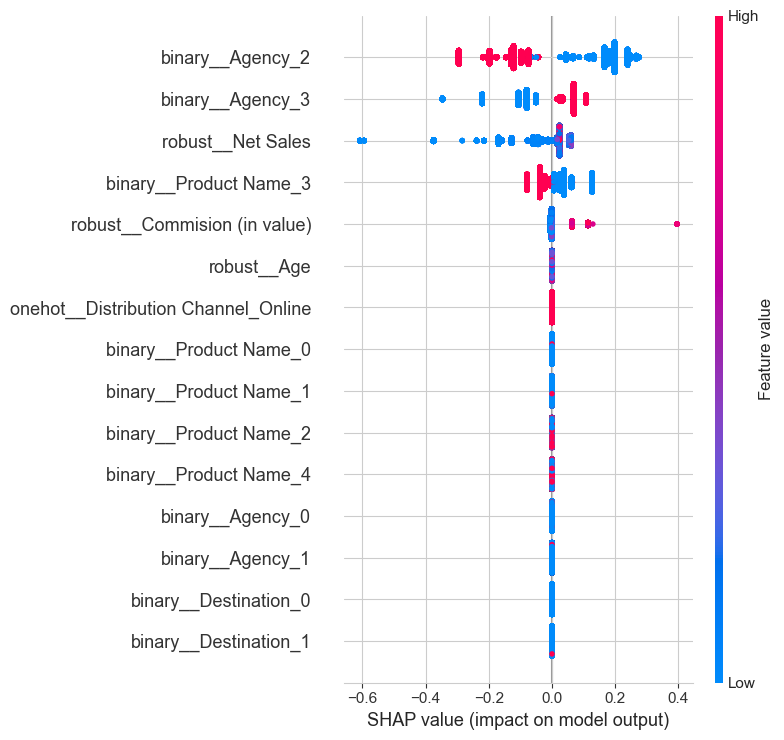

<Figure size 640x480 with 0 Axes>

In [ ]:
# For classification - use values for one class
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values.values[:,:,1], X_transform_resampled, max_display=15)  # [:,:,1] for class 1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
label_names = y_train.astype("str")

In [ ]:
fig, ax = plt.subplots(layout="constrained")
fig.set_size_inches(150, 100)

plot_tree(dtree_model, 
            feature_names=feature_names,
            class_names=label_names,
            filled=False,
            rounded=True,
            ax=ax)

fig.savefig('tree.png') # LIHATNYA ZOOM IN DI FILENYA YA BUKAN DARI CHART DISINI KARENA TREENYA KEGEDEAN

#### **10.1.2. XGBoost**

In [ ]:
pipe_tuned_xgboost.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))]...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.011300645858107587),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=3, max_leaves=None,
                               min_child_weight=36, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=90, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
# Save tuned model with timestamp
model_filename = f"pipe_tuned_xgboost{timestamp}.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(pipe_tuned_xgboost, f)
print(f"Model saved as: {model_filename}")

Model saved as: pipe_tuned_xgboost20251113_1122.pkl


In [ ]:
pipe_tuned = joblib.load("pipe_tuned_xgboost20251113_1122.pkl")
pipe_tuned

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Product Name', 'Agency',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))]...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.011300645858107587),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=3, max_leaves=None,
                               min_child_weight=36, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=90, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
pipe_tuned.steps

[('preprocessing',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(drop='first',
                                                 sparse_output=False),
                                   ['Agency Type', 'Distribution Channel']),
                                  ('binary', BinaryEncoder(),
                                   ['Product Name', 'Agency', 'Destination']),
                                  ('robust', RobustScaler(),
                                   Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])),
 ('resampling', None),
 ('xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_pol

In [ ]:
xgboost_model = pipe_tuned['xgboost']
xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.011300645858107587), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=3, max_leaves=None, min_child_weight=36, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [ ]:
preprocess_tuned = pipe_tuned["preprocessing"]
preprocess_tuned

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Product Name', 'Agency', 'Destination']),
                                ('robust', RobustScaler(),
                                 Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object'))])

In [ ]:
X_trans = preprocess_tuned.transform(X)
X_trans

onehot__Agency Type_Travel Agency  onehot__Distribution Channel_Online  \
0                                    0.0                                  1.0   
1                                    1.0                                  1.0   
2                                    0.0                                  1.0   
3                                    1.0                                  1.0   
4                                    0.0                                  1.0   
...                                  ...                                  ...   
44323                                1.0                                  1.0   
44324                                1.0                                  1.0   
44325                                1.0                                  0.0   
44326                                1.0                                  1.0   
44327                                1.0                                  1.0   

       binary__Product Name_0  binary__Product Name_1  binary__Product Name_2  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       1   
4                           0                       0                       1   
...                       ...                     ...                     ...   
44323                       0                       0                       1   
44324                       0                       0                       1   
44325                       0                       1                       1   
44326                       0                       0                       1   
44327                       0                       0                       1   

       binary__Product Name_3  binary__Product Name_4  binary__Agency_0  \
0                           0                       1                 0   
1                           1                       0                 0   
2                           1                       1                 0   
3                           0                       0                 0   
4                           0                       1                 0   
...                       ...                     ...               ...   
44323                       0                       0                 0   
44324                       1                       1                 0   
44325                       1                       1                 1   
44326                       0                       0                 0   
44327                       1                       1                 0   

       binary__Agency_1  binary__Agency_2  ...  binary__Destination_2  \
0                     0                 0  ...                      0   
1                     0                 1  ...                      0   
2                     0                 1  ...                      0   
3                     0                 1  ...                      0   
4                     0                 0  ...                      0   
...                 ...               ...  ...                    ...   
44323                 0                 1  ...                      0   
44324                 1                 0  ...                      0   
44325                 0                 1  ...                      0   
44326                 0                 1  ...                      0   
44327                 1                 0  ...                      0   

       binary__Destination_3  binary__Destination_4  binary__Destination_5  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                     

In [ ]:
feature_names = X_trans.columns
feature_names

Index(['onehot__Agency Type_Travel Agency',
       'onehot__Distribution Channel_Online', 'binary__Product Name_0',
       'binary__Product Name_1', 'binary__Product Name_2',
       'binary__Product Name_3', 'binary__Product Name_4', 'binary__Agency_0',
       'binary__Agency_1', 'binary__Agency_2', 'binary__Agency_3',
       'binary__Destination_0', 'binary__Destination_1',
       'binary__Destination_2', 'binary__Destination_3',
       'binary__Destination_4', 'binary__Destination_5',
       'binary__Destination_6', 'binary__Destination_7', 'robust__Duration',
       'robust__Net Sales', 'robust__Commision (in value)', 'robust__Age'],
      dtype='object')

In [ ]:
#Define Explainer
#untuk tree based (xgbosst, random forest, bagging, dsb) pakai TreeExplainer
#kalau linear/ logistic pakai LinearExplainer
explainer_shap = shap.TreeExplainer(
    model = xgboost_model,
    data = X_trans)

#Hitung shap value untuk tiap data
shap_values = explainer_shap.shap_values(X_trans)

100%|===================| 43581/43610 [01:52<00:00]        

In [ ]:
shap_values

array([[ 0.        ,  0.        ,  0.        , ...,  0.3403357 ,
         0.04436747, -0.00095414],
       [ 0.        ,  0.        ,  0.        , ..., -0.2034969 ,
        -0.02527106, -0.00119267],
       [ 0.        ,  0.        ,  0.        , ..., -0.1428225 ,
         0.0195229 ,  0.00882578],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.08005437,
         0.0195229 , -0.00453216],
       [ 0.        ,  0.        ,  0.        , ...,  0.23595221,
        -0.00772252, -0.00453216],
       [ 0.        ,  0.        ,  0.        , ..., -0.35122132,
         0.01210647, -0.00047707]], shape=(43610, 23))

In [ ]:
shap_values.shape

(43610, 23)

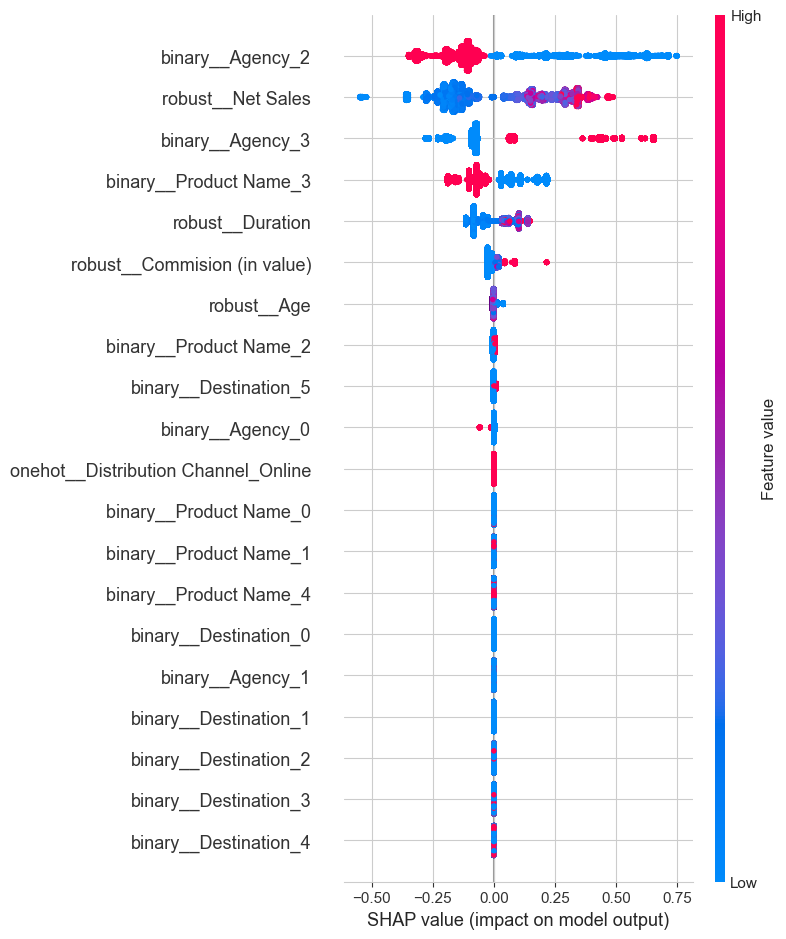

In [ ]:
#Tampilkan dalam bentuk beeswarm 
plt.figure(figsize = (10,9))
shap.summary_plot(shap_values,
                  X_trans,
                  feature_names  = feature_names)

## **11. Lime**

Because the feature importance is more explainable using the xgboost method, therefore only the xgboost model is configured with the lime explainer

In [ ]:
## dengan lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
sample_X_transform = X_trans.iloc[0]
sample_X_transform

onehot__Agency Type_Travel Agency      0.000000
onehot__Distribution Channel_Online    1.000000
binary__Product Name_0                 0.000000
binary__Product Name_1                 0.000000
binary__Product Name_2                 0.000000
binary__Product Name_3                 0.000000
binary__Product Name_4                 1.000000
binary__Agency_0                       0.000000
binary__Agency_1                       0.000000
binary__Agency_2                       0.000000
binary__Agency_3                       1.000000
binary__Destination_0                  0.000000
binary__Destination_1                  0.000000
binary__Destination_2                  0.000000
binary__Destination_3                  0.000000
binary__Destination_4                  0.000000
binary__Destination_5                  0.000000
binary__Destination_6                  0.000000
binary__Destination_7                  1.000000
robust__Duration                       7.976744
robust__Net Sales                      6

In [ ]:
## Dengan LIME

#Create LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data = X_trans.values, #lime tabular butuh input array ga bisa dataframe
    feature_names = feature_names, # karena harus ada array, perlu ini biar ada nama kolomnya
    mode="classification", #untuk model klasifikasi
    random_state = 0, # biar gak keubah pas di run ulang
    class_names = ["Not Claim", "Claim"] #optional
)

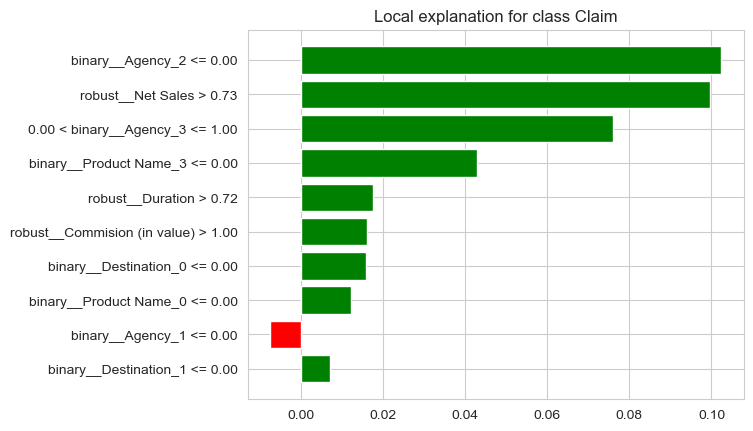

In [ ]:
explanation = explainer_lime.explain_instance(
    data_row = sample_X_transform.values, #sample yang mau dijelaskan (harus_array)
    predict_fn = xgboost_model.predict_proba, #model untuk prediksi
    num_features = 10 #top 10 features
)

#Display explanation plot
fig = explanation.as_pyplot_figure()
plt.show()

## **12. Summary and Recommendation**

### **12.1. Summary**

#### **12.1.1. Model Summary**

##### **Decision Tree Model**
##### Strengths:

- Highly Interpretable: Simple tree structure (max_depth=3) is easy to visualize and explain to stakeholders
- Fast Training & Prediction: Minimal computational requirements
- No Feature Scaling Required: Works directly with raw encoded features
- Clear Decision Rules: Explicit thresholds visible in tree diagram
- Good Generalization: Train/test F-beta scores are similar (0.47 vs 0.45)
- Handles Class Imbalance: Uses class_weight='balanced' and RandomOverSampler effectively

#### Weaknesses:

- Lower Recall (63%): Misses 37% of actual claims, costing $486,000 in False Negatives
- Very Low Precision (7%): 93% of predicted claims are false alarms (1,123 False Positives)
- Limited Feature Interactions: Depth=3 constrains complex pattern learning
- High Variance: Sensitive to small data changes despite regularization
- Binary Splits Only: Cannot capture nuanced relationships between features
- Suboptimal for Imbalanced Data: Despite tuning, still struggles with rare positive class


##### **XGBoost Model**
##### Strengths:

- Best Recall (66%): Catches 89 out of 134 claims, minimizing costly False Negatives
- Superior Generalization: Nearly identical train/test performance (0.47 vs 0.47)
- Robust to Imbalance: scale_pos_weight=63 effectively handles 1.5% positive class
- Ensemble Power: 90 weak learners capture complex patterns
- Built-in Regularization: max_depth=3, min_child_weight=36, low learning_rate prevent overfitting
- Feature Interaction Modeling: Better captures relationships between features
- Best Financial Outcome: Saves additional $5,600 compared to Decision Tree

##### Weaknesses:

- Low Precision (7%): Still generates 1,209 False Positives ($604,500 in unnecessary reserves)
- Harder to explain to non-technical stakeholders
- Longer Training Time: Requires more computational resources
- Hyperparameter Sensitivity: Extensive tuning needed (200 iterations used)
- Risk of Overfitting: Requires careful validation despite current good performance
- Slower Inference: More complex than Decision Tree for real-time predictions




#### **12.1.2. SHAP Summary**

Based on SHAP analysis, the most influential features for claim prediction are:

- Duration: Longer trips significantly increase claim probability
    - Insight: Extended travel = higher exposure to risks (medical, cancellation)
- Net Sales / Commission: Higher premium products correlate with claims
    - Insight: Comprehensive coverage attracts risk-aware customers
- Age: Older travelers show higher claim rates
    - Insight: Health-related claims increase with age

### **12.2. Recommendation**

#### **12.2.1. Model Recommendations**

- There are alot of binary encoded features in both models, it is recommended to use onehot encoder in any feature that is possible. For example, the destination can be grouped into regions so there will be less values and can be onehot encoded. This will be easier to intreprate and explain to stakeholders
- Use GridSearch for more accurate representation of the data. This analysis uses RandomSearch because of hardware limitations
- Add more features such as economic status, historical behaviour, travel purpose, etc.

#### **12.2.2. Bussiness Recommendations**

- Use the machine learning model to make decisions on premium fee:
    - High chance of claim risk -> adjusted higher premium to cover expected cost.  
    - Low chance of claim risk -> competitive pricing to compete with other competitors
- Customer can be segmented according to the likelihood of them claiming the insurance or not
- To cut cost, use automation for low risk customer, human interaction for high risk customer


## **Streamlit and Github**

In [ ]:
import dill

In [ ]:
##Save the lime explainer untuk deployment
with open ("lime_explainer.dill", 'wb') as file:
    dill.dump(explainer_lime, file)

print("LIME EXPLAINER SAVED SUCCESFULLY")

LIME EXPLAINER SAVED SUCCESFULLY


In [ ]:
#cek versi sklearn
import sklearn
import xgboost
import imblearn
import numpy as np
import pandas as pd
import streamlit as st
import joblib
import dill
import matplotlib
import category_encoders

In [ ]:
modules = [sklearn, xgboost, imblearn, np, pd, st, joblib, dill, matplotlib, category_encoders]
for module in modules:
    versi = module.__version__
    print(f"Versi modul {module} = {versi} ")

Versi modul <module 'sklearn' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\sklearn\\__init__.py'> = 1.7.1 
Versi modul <module 'xgboost' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\xgboost\\__init__.py'> = 2.1.1 
Versi modul <module 'imblearn' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\imblearn\\__init__.py'> = 0.14.0 
Versi modul <module 'numpy' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\numpy\\__init__.py'> = 2.3.3 
Versi modul <module 'pandas' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\pandas\\__init__.py'> = 2.3.2 
Versi modul <module 'streamlit' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\streamlit\\__init__.py'> = 1.49.1 
Versi modul <module 'joblib' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\joblib\\__init__.py'> = 1.5.2 
Versi modul <module 'dill' from 'd:\\Data\\miniconda3\\envs\\base_copy\\Lib\\site-packages\\dill\\__init__.py'>

In [ ]:
pip show lime

Name: lime
Version: 0.2.0.1
Summary: Local Interpretable Model-Agnostic Explanations for machine learning classifiers
Home-page: http://github.com/marcotcr/lime
Author: Marco Tulio Ribeiro
Author-email: marcotcr@gmail.com
License: BSD
Location: d:\Data\miniconda3\envs\base_copy\Lib\site-packages
Requires: matplotlib, numpy, scikit-image, scikit-learn, scipy, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
to_requirements = '''scikit-learn==1.7.1
xgboost==2.1.1
imbalanced-learn==0.14.0 
numpy==2.3.3 
pandas==2.3.2 
streamlit==1.49.1 
matplotlib==3.10.6 
joblib==1.5.2 
dill==0.4.0
lime==0.2.0.1
category-encoders==2.8.1 
'''

In [ ]:
with open ("requirements.txt", "w") as file:
    file.write(to_requirements) #ga pakai binary karena mau ngesave text

print("TO REQUIREMENT SAVED SUCCESFULLY")

TO REQUIREMENT SAVED SUCCESFULLY


In [ ]:
pd.set_option('display.max_colwidth', None)


cat_feature_cols = X.select_dtypes(exclude='number').columns

unique_values_df = pd.DataFrame({
    'column': cat_feature_cols,
    'unique_values': [X[col].unique().tolist() for col in cat_feature_cols]
})


unique_values_df.to_csv("kolom_kategori_unique_values.csv", index = False)
unique_values_df

column  \
0                Agency   
1           Agency Type   
2  Distribution Channel   
3          Product Name   
4           Destination   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       unique_values  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, TTW, ADM, CCR, CBH]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [Airlines, Travel Agency]  
2                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
X.describe()

Duration     Net Sales  Commision (in value)           Age
count  43610.000000  43610.000000          43610.000000  43610.000000
mean      48.363724     40.437315              9.563817     38.712153
std       73.825994     48.660413             19.616611     10.093152
min        1.000000   -357.500000              0.000000      0.000000
25%       10.000000     18.000000              0.000000     35.000000
50%       22.000000     26.000000              0.000000     36.000000
75%       53.000000     48.000000             10.500000     42.000000
max      740.000000    682.000000            262.760000     88.000000